<a href="https://colab.research.google.com/github/princeKike27/Khiron-Next-Buyers-FM/blob/main/Khiron_Next_Buyers_FM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Khiron Next Buyers

For this project ...

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

In [1]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data files

# sales df
df_sales = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Compras_FMs.csv',\
    sep=';')

# procedures df
df_procedures = pd.read_csv(
    'https://raw.githubusercontent.com/princeKike27/Khiron-Next-Buyers-FM/main/Procedimientos_FMs.csv',\
    sep=';')

In [3]:
# check procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA


In [4]:
# check sales df
df_sales.head()

,ingreso,cedula,fecha_oc
0,26806,390646,19/03/2020
1,26793,13352962,19/03/2020
2,26928,19059029,19/03/2020
3,26891,31259698,19/03/2020
4,26720,41453437,19/03/2020


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Procedures FM

In [5]:
# procedures df
df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA


In [6]:
# check shape of df
df_procedures.shape

(35187, 19)

In [7]:
# check column types
df_procedures.dtypes

Ingreso               int64
DocPaciente          object
Fecha Nacimiento     object
Edad                  int64
Sexo                 object
CiudadMunicipio      object
Diagnostico          object
CodigoDiagnostico    object
Plan                 object
Tipo Plan            object
FechaIngreso         object
FechaFormulacion     object
CodProducto          object
Cantidad              int64
DocMedico             int64
NombreMedico         object
Especialidad         object
Plan/Servicio        object
Sede                 object
dtype: object

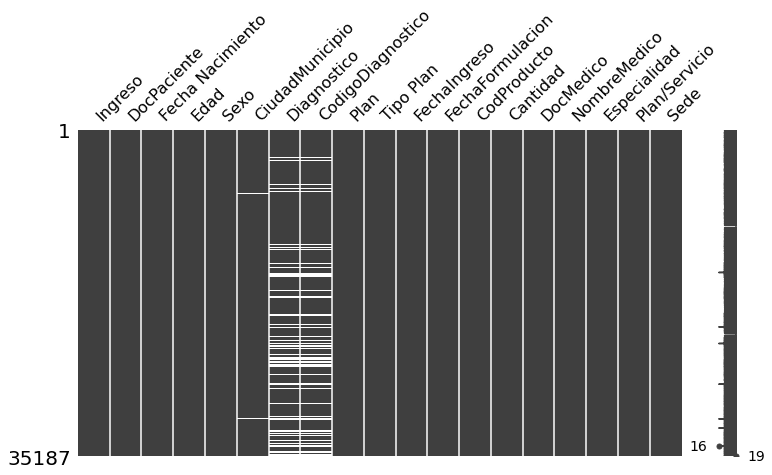

In [8]:
# check for missing values
import missingno as msg

msg.matrix(df_procedures, figsize=(12, 6))

In [9]:
# find number of missing values in 'Diagnostico'

na_diagnostic = df_procedures['Diagnostico'].isna().sum()
na_city = df_procedures['CiudadMunicipio'].isna().sum()

print(f'Missing Values in Diagnostico: {na_diagnostic}')
print(f'Missing values in CiudadMunicipio: {na_city}')

Missing Values in Diagnostico: 6426
Missing values in CiudadMunicipio: 20


In [10]:
# drop na values of CiudadMunicipio
df_procedures = df_procedures.dropna(subset=['CiudadMunicipio'])

# check shape
df_procedures.shape

(35167, 19)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### GroupBy of Relevant Features


In [11]:
# descriptive statistics
df_procedures.describe()

,Ingreso,Edad,Cantidad,DocMedico
count,35167.000000,35167.000000,35167.000000,3.516700e+04
mean,152045.264396,58.010351,1.349362,3.059599e+08
std,47766.591744,15.819550,0.754741,4.446890e+08
min,26720.000000,1.000000,1.000000,1.374997e+07
25%,117779.500000,48.000000,1.000000,1.906250e+07
50%,157990.000000,58.000000,1.000000,7.226080e+07
75%,191695.500000,69.000000,2.000000,1.017171e+09
max,225591.000000,101.000000,30.000000,1.235245e+09


#### Number of FMs Prescriptions by Site

In [12]:
# FM procedures by sede
fm_proced_sede = df_procedures.groupby(['Sede']).Cantidad.sum().reset_index()

fm_proced_sede['%_Prescripciones'] = (fm_proced_sede.Cantidad / fm_proced_sede.Cantidad.sum()) * 100
fm_proced_sede

,Sede,Cantidad,%_Prescripciones
0,COUNTRY,3952,8.328241
1,PARKWAY,922,1.942975
2,ZERENIA,41349,87.136746
3,ZERENIA - IBAGUE,106,0.223379
4,ZERENIA - MEDELLÍN,420,0.885086
5,ZERENIA - ARMENIA,61,0.128548
6,ZERENIA - BARRANQUILLA,89,0.187554
7,ZERENIA - BUCARAMANGA,177,0.373001
8,ZERENIA - CALI,256,0.539481
9,ZERENIA - MANIZALES,3,0.006322


is_Zerenia is a relevant feature since 87.13% of FMs prescribed come from this clinic

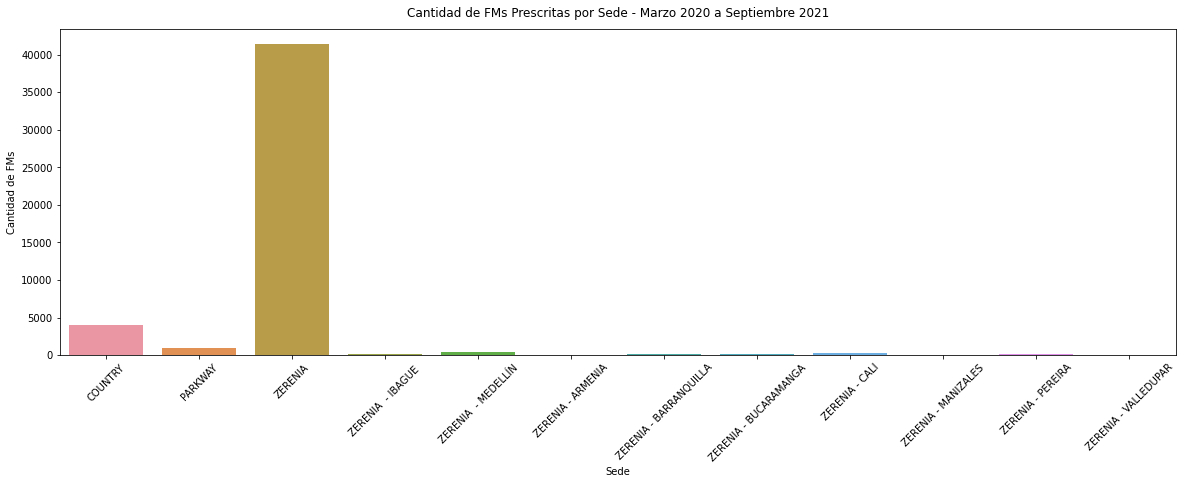

In [13]:
# barplot of prescribed FMs per Sede

f, ax = plt.subplots(figsize=(20,6))

sns.barplot(x=fm_proced_sede.Sede, y=fm_proced_sede.Cantidad)
# rotate x labels
plt.xticks(rotation=45)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sede - Marzo 2020 a Septiembre 2021', pad=12)
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Sex

In [14]:
# FM procedures by sexo
fm_proced_sex = df_procedures.groupby(['Sexo']).Cantidad.sum().reset_index()

fm_proced_sex['%_Prescripciones'] = (fm_proced_sex.Cantidad / fm_proced_sex.Cantidad.sum()) * 100
fm_proced_sex

,Sexo,Cantidad,%_Prescripciones
0,F,33715,71.049249
1,I,1,0.002107
2,M,13737,28.948644


The category 'I' of Sex is not going to be taken into account since Male(M) and Female(F) correspond to 99% of all patients prescribed 

In [15]:
# make dataframe without Sexo == I
df_procedures = df_procedures[df_procedures['Sexo'] != 'I']

df_procedures.Sexo.unique()

array(['F', 'M'], dtype=object)

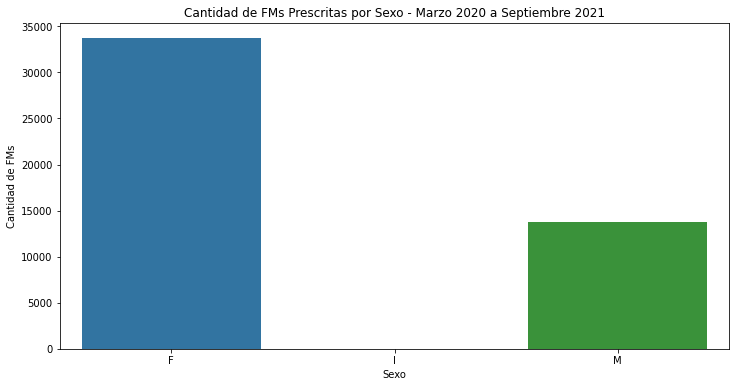

In [16]:
# barplot of prescribed FMs per Sexo

f, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=fm_proced_sex.Sexo, y=fm_proced_sex.Cantidad)
plt.ylabel('Cantidad de FMs')

plt.title('Cantidad de FMs Prescritas por Sexo - Marzo 2020 a Septiembre 2021')
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Service/Plan

In [17]:
# FMs prescribed by Plan/Servicio
fm_proced_plan = df_procedures.groupby(['Plan/Servicio']).Cantidad.sum().reset_index()

fm_proced_plan['%'] = (fm_proced_plan.Cantidad / fm_proced_plan.Cantidad.sum()) * 100
fm_proced_plan

,Plan/Servicio,Cantidad,%
0,Cannabis Medicinal,3068,6.465481
1,Consulta Dolor y Cuidados Paliativos,34436,72.570176
2,Dolor y Cuidados Paliativos Bloqueos,14,0.029503
3,Dolor y Cuidados Paliativos Lisis,1,0.002107
4,Fisioterapia,1,0.002107
5,Flete Formula Magistral,8,0.016859
6,Juntas Médicas,119,0.250780
7,Medicina Fisica y Rehabilitacion,6,0.012644
8,Medicina General,1,0.002107
9,Medicina General.,1495,3.150552


 The most relevant Services on the number of FMs prescribed are:
 - is_Dolor_Paliativo >> 72.57% of FMs prescribed
 - is_Psiquiatria >> 11.58% of FMs prescribed
 - is_Cannabis >> 6.46% of FMs prescribed
 - is_Neurology >> 3.57% of FMs prescribed

These Services correspond to 97.1% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by Product Type

In [18]:
# FMs prescribed by CodProducto
fm_proced_prod = df_procedures.groupby(['CodProducto']).Cantidad.sum().reset_index()

fm_proced_prod['%'] = (fm_proced_prod.Cantidad / fm_proced_prod.Cantidad.sum()) * 100
fm_proced_prod

,CodProducto,Cantidad,%
0,fm001,26989,56.876422
1,fm002,722,1.521538
2,fm003,17773,37.454691
3,fm004,1816,3.827025
4,fm005,152,0.320324


The most relevant product types on the number of FMs prescribed are:
- fm001 >> 56.87% of FMs prescribed
- fm003 >> 37.45% of FMs prescribed

These two product types correspond to 94.3% of FMs prescribed

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

#### Number of FMs Prescribed by FechaFormulacion

In [19]:
# convert FechaFormulacion to datetime
df_procedures['FechaFormulacion'] = pd.to_datetime(df_procedures['FechaFormulacion'])

# check that the change was made
df_procedures.dtypes

Ingreso                       int64
DocPaciente                  object
Fecha Nacimiento             object
Edad                          int64
Sexo                         object
CiudadMunicipio              object
Diagnostico                  object
CodigoDiagnostico            object
Plan                         object
Tipo Plan                    object
FechaIngreso                 object
FechaFormulacion     datetime64[ns]
CodProducto                  object
Cantidad                      int64
DocMedico                     int64
NombreMedico                 object
Especialidad                 object
Plan/Servicio                object
Sede                         object
dtype: object

In [21]:
# create month and year column >> using pd.DatetimeIndex()
df_procedures['Month'] = pd.DatetimeIndex(df_procedures['FechaFormulacion']).month
df_procedures['Year'] = pd.DatetimeIndex(df_procedures['FechaFormulacion']).year

df_procedures.head()

,Ingreso,DocPaciente,Fecha Nacimiento,Edad,Sexo,CiudadMunicipio,Diagnostico,CodigoDiagnostico,Plan,Tipo Plan,FechaIngreso,FechaFormulacion,CodProducto,Cantidad,DocMedico,NombreMedico,Especialidad,Plan/Servicio,Sede,Month,Year
0,26720,41453437,30/09/1949,72,F,BOGOTÁ D.C.,(OSTEO)ARTROSIS PRIMARIAGENERALIZADA,M150,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020
1,26793,13352962,10/11/1960,61,M,BOGOTÁ D.C.,"TRASTORNO DE DISCO LUMBAR YOTROS, CON RADICULO...",M511,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020
2,26806,390646,1/08/1934,87,M,BOGOTÁ D.C.,NEURALGIA POSTHERPES ZOSTER(B02.2†),G530,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53013811,LENIS RIVERA,Algesiólogo,Consulta Dolor y Cuidados Paliativos,ZERENIA,3,2020
3,26928,19059029,13/09/1948,73,M,BOGOTÁ D.C.,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,3,2020
4,26846,41595666,20/09/1953,68,F,CAJICÁ,NaN,NaN,PLAN PARTICULAR,Particular,2020-03-19,2020-03-19,fm001,1,53007921,XIOMARA GARCIA,Neurologia,Neurologia,ZERENIA,3,2020


In [30]:
# function to calcultate number and avg of presribed FMs
def sum_avg_fm(df):
  calc={}
  calc['Numero_Prescripciones'] = len(df)
  calc['Cantidad_FMs'] = df['Cantidad'].sum()


  return pd.Series(calc, index=['Numero_Prescripciones', 'Cantidad_FMs', ])

In [44]:
# FMs prescribed by month/year
fm_proced_month = df_procedures.groupby(['Year', 'Month']).apply(sum_avg_fm).reset_index()

fm_proced_month['%_Cantidad'] = (fm_proced_month['Cantidad_FMs'] / fm_proced_month['Cantidad_FMs'].sum()) * 100
fm_proced_month

,Year,Month,Numero_Prescripciones,Cantidad_FMs,%_Cantidad
0,2020,3,8,9,0.018967
1,2020,4,85,88,0.185451
2,2020,5,127,131,0.276068
3,2020,6,357,381,0.802917
4,2020,7,600,614,1.293939
5,2020,8,953,978,2.061030
6,2020,9,1237,1295,2.729074
7,2020,10,1306,1439,3.032538
8,2020,11,1256,1447,3.049397
9,2020,12,1371,1602,3.376043


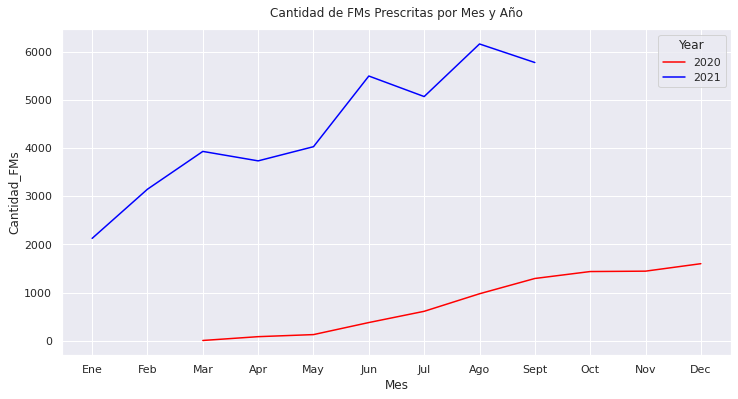

In [56]:
# lineplot of number of prescriptions by month

f, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(x=fm_proced_month['Month'], y=fm_proced_month['Cantidad_FMs'], hue=fm_proced_month['Year'], palette=['red', 'blue'])
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Ene', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Ago', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.xlabel('Mes')
plt.title('Cantidad de FMs Prescritas por Mes y Año', pad=12)
plt.show()